# Physics 256
## Rejection Sampling

<img src="http://www.jarad.me/figs/2013-10-03-rejection-sampling/unnamed-chunk-4.png" width=400px>


## Last Time

- Generation and testing of pseudorandom numbers
- Tower sampling

## Today

- Exponential distribution
- Box-Muller for Gaussian random numbers
- Rejection Sampling


## Setting up the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('notebook');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

## Sampling Continous Distributions

Last time we saw that we can sample from any continuous probability distribution $p(y)$ using only uniformly distributed random numbers $x$:

\begin{equation}
P(y) = \int_{-\infty}^y p(y') dy' = \int_{-\infty}^{y} \frac{dx}{dy'}  p_u(x) dy' = \int_0^y \frac{dx}{dy'} dy' = x(y)
\end{equation}

So $y = P^{-1}(x)$ for $x \in \mathcal{U}_{[0,1]}$.


### Example 2
Consider sampling from the exponential distribution for $y\ge 0$:

\begin{equation}
p(y) = \lambda \mathrm{e}^{-\lambda y}.
\end{equation}

As before:

\begin{equation}
x(y) =\int_0^y p(y') dy' = \lambda \int_0^y \mathrm{e}^{-\lambda y'}dy' = \left.-\mathrm{e}^{-\lambda y'} \right \rvert_0^y = 1 - \mathrm{e}^{-\lambda y} .
\end{equation}

Solving for $x$:

\begin{align*}
\mathrm{e}^{-\lambda y} &= 1-x \newline
-\lambda y &= \ln (1-x) \newline
y &= -\frac{1}{\lambda} \ln (1-x) 
\end{align*}

which gives $y \in [0,\infty)$ for $x \in [0,1)$.

<br />
<div class="span alert alert-danger">
Note: we need to be careful with our uniform random number $x$ as it can formally take on the end point value $x=1$. 
</div>



<div class="span alert alert-success">
<h2>Programming challenge </h2>
Generate $N=1000$ exponentially distributed random numbers with $\lambda = 0.5$ and check their distribution using a histogram.
</div>

In [ ]:
def p(y,λ):
    return ### INSERT CODE HERE

N = 1000
λ = 0.5
y = np.linspace(0,100,N)
plt.plot(y,p(y,λ),color=colors[0], label=r'$%3.1f\mathrm{e}^{-%3.1fy}$'%(λ,λ))

# sample y from a uniform x
###
# INSERT CODE HERE
###

plt.hist(sampled_y, bins=100, normed=True, ec='w', label='sampled');
plt.xlim(0,10);
plt.xlabel('y')
plt.ylabel('p(y)')
plt.title('Exponential Distribution')
plt.legend(loc='upper right')

## Gaussian Distributed Random Numbers

Consider the normal or Gaussian probability distribution with mean $\mu=0$:

\begin{equation}
p_n(y) = \frac{1}{\sqrt{2\pi\sigma^2}} \mathrm{e}^{-y^2/2\sigma^2}.
\end{equation}

We have already seen the cumulative distribution function: 

\begin{align*}
P_n(y) &= \int_{-\infty}^{y} p_n(y') \newline
&=\frac{1}{2}\left[1 + \mathrm{erf}\left(\frac{y}{\sqrt{2} \sigma}\right) \right]
\end{align*}

which cannot be analytically inverted.  However, we can use the same trick that is used to evaluate Gaussian integrals, i.e. extending our calculation to higher dimensions.  In this case, that means considering the multivariate probability distribution:

\begin{equation}
p_n(x,y) = p_n(x)p_n(y) = \frac{1}{2\pi\sigma^2} \mathrm{e}^{-(x^2+y^2)/2\sigma^2}.
\end{equation}

Let us transform to polar coordinates defined by:

\begin{align*}
r &= \sqrt{x^2+y^2} \newline
\theta &= \tan^{-1} \left(\frac{y}{x}\right)
\end{align*}

thus:

\begin{equation}
p_n(x,y)dx dy = \frac{1}{2\pi\sigma^2} \mathrm{e}^{-r^2/2\sigma^2} r dr d\theta .
\end{equation}

Defining

\begin{equation}
\rho = \frac{r^2}{2\sigma^2}  \Rightarrow d\rho = \frac{r dr}{\sigma^2}
\end{equation}

we have:

\begin{align*}
x &= \sqrt{2\rho}\sigma \cos\theta \newline
y &= \sqrt{2\rho}\sigma \sin\theta \newline
\end{align*}

and

\begin{equation}
p_n(x,y)dx dy = \frac{1}{2\pi} \mathrm{e}^{-\rho} d\rho d\theta .
\end{equation}

We know how to sample both scaled uniform random numbers $\theta \in \mathcal{U}_{[0,2\pi]}$ and exponentially distributed random numbers $\rho \in \mathrm{e}^{-\rho}$.  Therefore we can write:

\begin{align*}
x &= \sqrt{-2\ln(1-x_1)}\sigma \cos(2\pi x_2) \newline
y &= \sqrt{-2\ln(1-x_1)}\sigma \sin(2\pi x_2)
\end{align*}

where $x_1,x_2 \in \mathcal{U}_{[0,1)}$, i.e. 2 uniformly distributed random numbers can be used to get two Gaussian distributed random numbers.  This is known as the **Box-Muller** method.

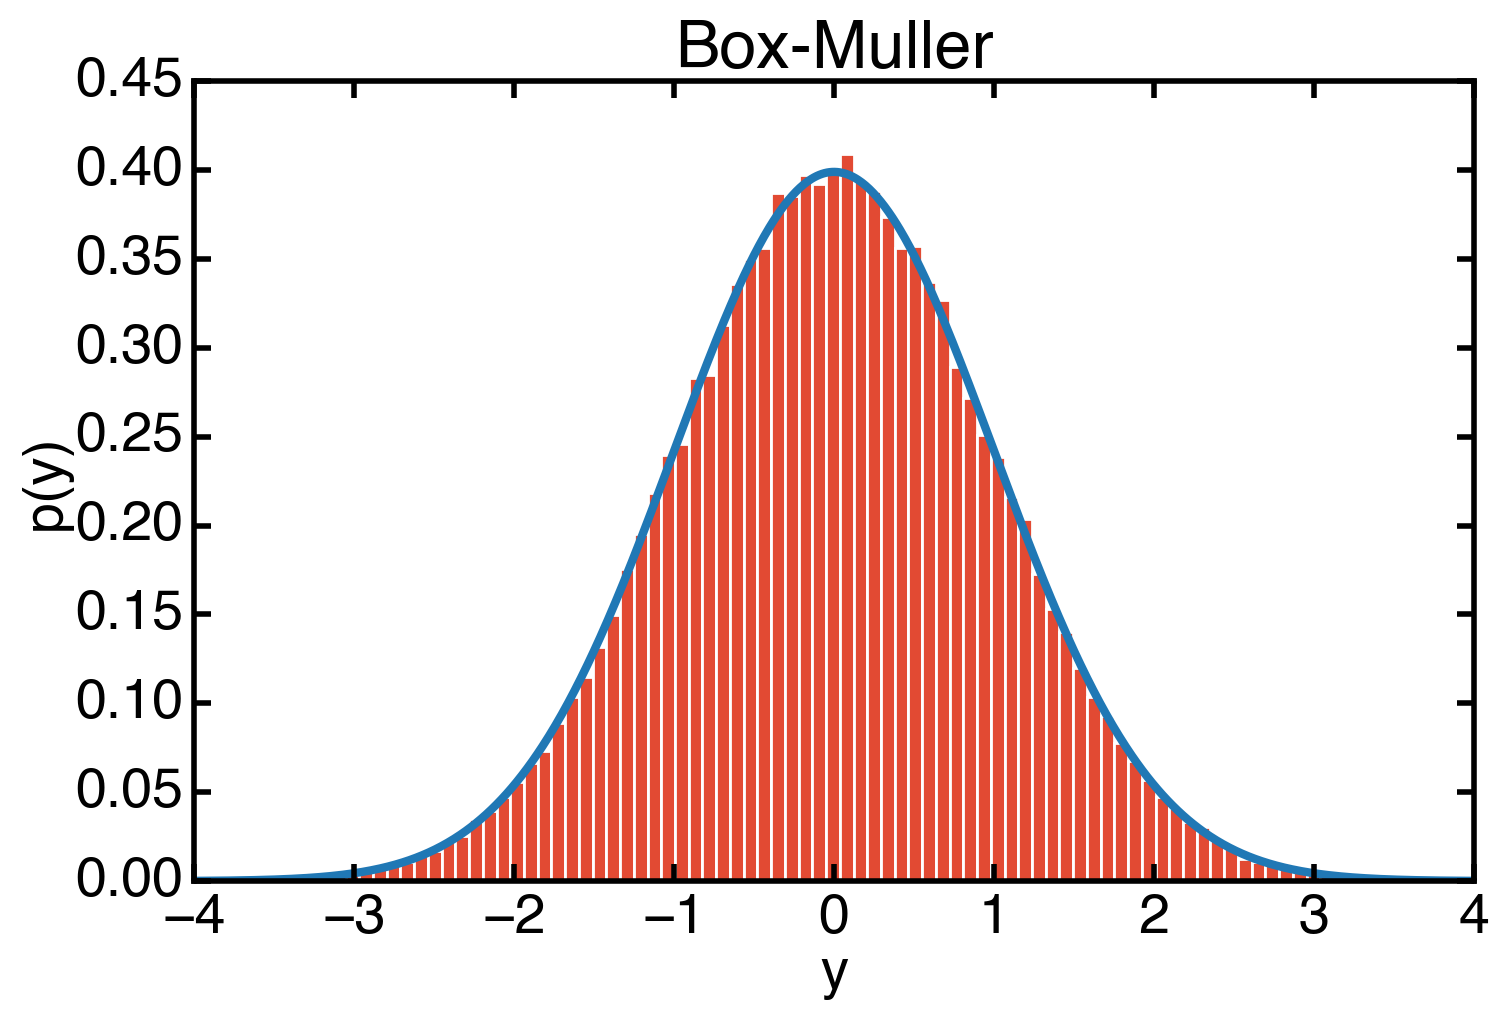

In [24]:
from scipy.constants import pi as π
N = 100000

# our uniform random numbers
x1 = np.random.random(N)
x2 = np.random.random(N)

# generate the Box-Muller values
x = np.sqrt(-2.0*np.log(1-x1))*np.cos(2.0*π*x2)
y = np.sqrt(-2.0*np.log(1-x1))*np.cos(2.0*π*x2)

# combine them into 1 array
r = np.hstack([x,y])

# produce a plot comparing with the actual distribution
px = np.linspace(-4,4,1000)
plt.plot(px,np.exp(-px**2/2)/np.sqrt(2*π), color=colors[0])
plt.hist(r, bins=100, normed=True, ec='w')
plt.xlabel('y')
plt.ylabel('p(y)')
plt.xlim(-4,4)
plt.title('Box-Muller')

## Rejection Sampling

What do we do if we can't invert the cumulative distribution function and we are out of tricks?